In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm 

In [54]:
class Planeta:
    
    def __init__(self, e, a, t):
        
        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo
        
        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor
        
        self.G = 4*np.pi**2 # Unidades gaussianas
        
        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)
        
        self.r[0] = self.a_*(1-self.e)
        self.v[1] = np.sqrt( self.G*(1+self.e)/(self.a_*(1.-self.e)) )
        
        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)
        
        # El valor del pasado
        self.rp = self.r
        
    def GetAceleration(self):
        
        d = np.linalg.norm(self.r)
        self.a = -self.G/d**3*self.r
        
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()
        
        if i==0:
            self.r = self.rp + self.v*self.dt
        else:
            
            # rp pasado, r presente rf futuro
            self.rf = 2*self.r - self.rp + self.a*self.dt**2
            self.v = (self.rf - self.rp)/(2*self.dt)
            
            self.rp = self.r
            self.r = self.rf
    
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def SetVelocity(self,i):
        self.V[i] = self.v
    
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def GetPerihelio(self):
        
        Dist = np.linalg.norm(self.R,axis=1)
        
        timeup = []
        
        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                timeup.append(self.t[i])
            
        return timeup
    
    def GetOrbitalPeriod(self):
        tiempo = self.GetPerihelio()
        periodo = tiempo[1] - tiempo[0]

        return periodo

In [55]:
def GetPlanetas(t):
    
    Mercurio = Planeta(0.2056,0.307,t)
    Venus = Planeta(0.0067,0.7233,t)
    Tierra = Planeta(0.01671,1.,t)
    Marte = Planeta(0.093315,1.523679,t)
    Jupiter = Planeta(0.04877,5.204267,t)
    
    return [Mercurio,Venus,Tierra,Marte,Jupiter]

In [56]:
dt = 0.001
tmax = 30
t = np.arange(0.,tmax,dt)
Planetas = GetPlanetas(t)

In [57]:
def RunSimulation(t,Planetas):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        #print(it)
        for i in range(len(Planetas)):
            Planetas[i].Evolution(it)
            # Aca debes agregar la interaccion con la pared
            
            
    return Planetas

In [58]:
Planetas = RunSimulation(t,Planetas)

Running simulation: 100%|██████████| 30000/30000 [00:02<00:00, 12747.84 Steps/s]


In [73]:

Periods = np.zeros(5)
for i in range(len(Periods)):
   Periods[i] = (Planetas[i].GetOrbitalPeriod())**2

SemiAxes = np.array([0.307,0.7233,1.,1.523679,5.204267])
for i in range(len(SemiAxes)):
   SemiAxes[i] = SemiAxes[i]**3
Periods,SemiAxes

(array([2.89000000e-02, 3.78225000e-01, 1.00200100e+00, 3.53816100e+00,
        1.40968129e+02]),
 array([2.89344430e-02, 3.78403718e-01, 1.00000000e+00, 3.53736965e+00,
        1.40954423e+02]))

Text(0, 0.5, 'Periodos (años)')

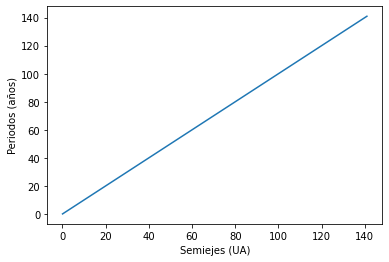

In [77]:
plt.plot(SemiAxes,Periods)
plt.xlabel("Semiejes (UA)")
plt.ylabel("Periodos (años)")

In [76]:
coefficients, cov_matrix = np.polyfit(SemiAxes, Periods, 1, cov=True)
coefficients

array([1.00009354e+00, 5.27671422e-04])

In [80]:
SolarMass = (4*np.pi**2)/(coefficients[0]*1.978*10**(-29))
SolarMass

1.9956888440734185e+30